# Final OCR result

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
from sklearn.datasets import make_blobs
from PIL import Image
import cv2

import OCR as OCR

<IPython.core.display.Javascript object>


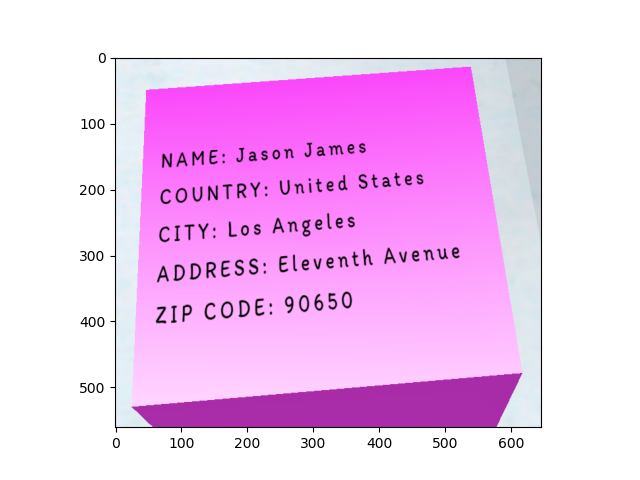

 NAME JASON JAMES
COUNTRY UNITED STATES
CITY LOS ANGELES
ADDRESS ELEVENTK AVENUE
ZIP CODE 9O65O


In [2]:
img = cv2.imread('../imgs/photos/1.png')

plt.figure()
plt.imshow(img)
plt.show()

text1 = OCR.OCR(img, 1, 'C8', 0)

print(text1)

<IPython.core.display.Javascript object>


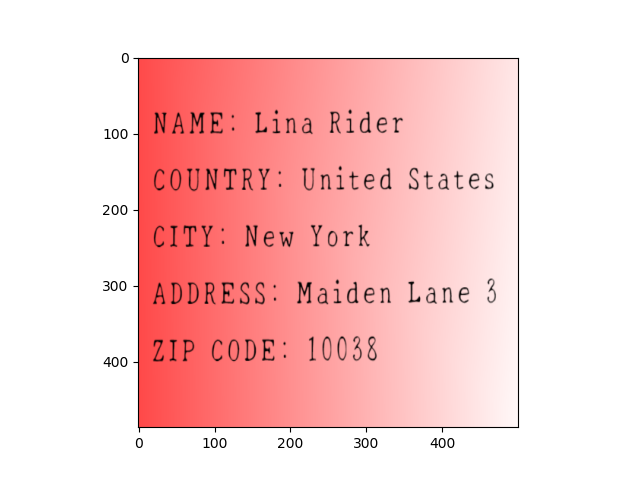

(487, 500)


In [3]:
#img = np.asarray(Image.open('../imgs/chars/labels/etiqueta1.png'), dtype=np.uint32)
img = Image.open('../imgs/experiments/segmentation/b6.png')

plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

img = np.mean(img, axis=2)

img = 255 - img
#img = np.where(img > 150, 0, 1)

print(img.shape)

In [4]:
import LettersNumbersClassification as LetNumClassif

# Train the MLP (only need to do it once as it saves the model in a file, so now it is commented)
#LetNumClassif.train('../imgs/chars')

In [5]:
im0 = OCR.OCR(img, 1, 'C8')

print(im0)

 NAME L1NA R1DER
COUNTRY UN1TED STATES
CITY NEKT YORK
ADDRESS MA1DEN LANE 3
ZIP CODE 1CO38


# Performance

In [6]:
s1 = "NAME JASON JAMES\nCOUNTRY UNITED STATES\nCITY LOS ANGELES\nADDRESS ELEVENTH AVENUE\nZIP CODE 90650"
s6 = "NAME LINA RIDER\nCOUNTRY UNITED STATES\nCITY NEW YORK\nADDRESS MAIDEN LANE 3\nZIP CODE 10038"
s9 = "NAME JACOB ANDERSON\nCOUNTRY UNITED STATES\nCITY LOS ANGELES\nADDRESS BEVERLY HILLS 8\nZIP CODE 90011"
s10 = "NAME SHANON CARTER\nCOUNTRY UNITED STATES\nCITY LOS ANGELES\nADDRESS FIGUEROA STREET 4\nZIP CODE 90017"
groundtruth = [s1, s6, s9, s10]

<IPython.core.display.Javascript object>


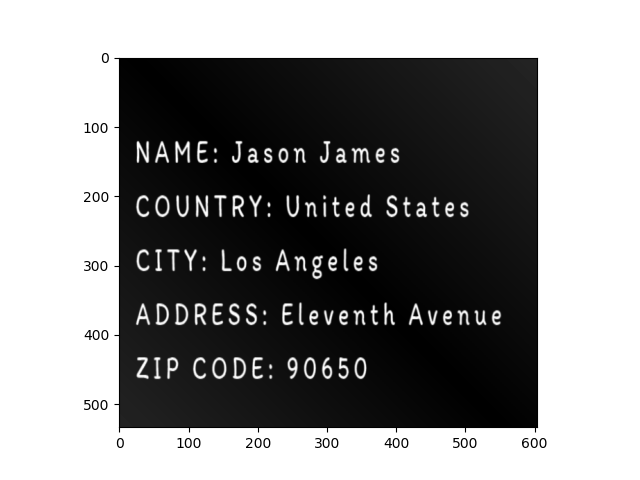

<IPython.core.display.Javascript object>


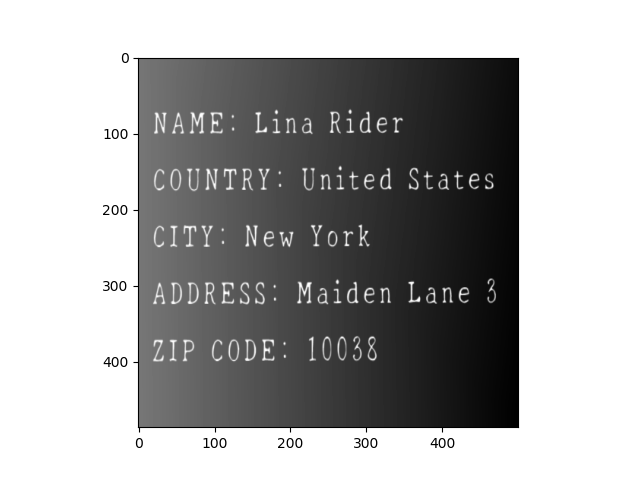

<IPython.core.display.Javascript object>


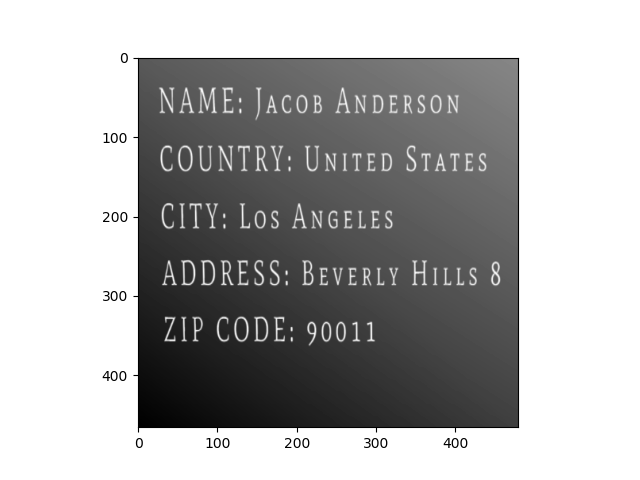

<IPython.core.display.Javascript object>


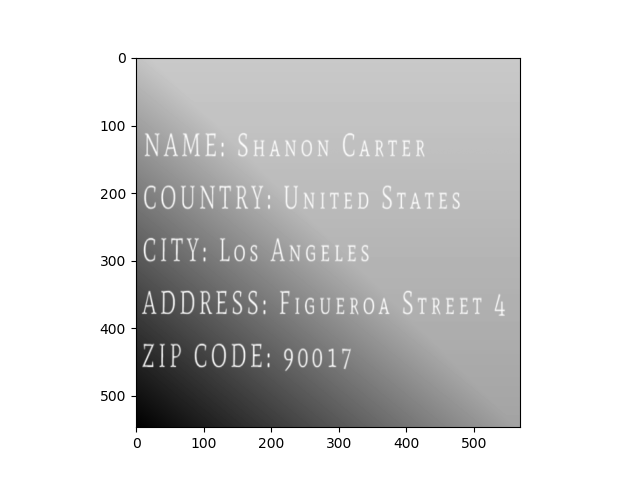

In [7]:
recog_text = []

for i,p in enumerate([1, 6, 9, 10]):
    #print('Image ' + str(i) + ':\n')
    
    img = Image.open('../imgs/experiments/segmentation/b' + str(p) + '.png')
    img = np.mean(img, axis=2)
    img = 255 - img

    plt.figure()
    plt.imshow(img, cmap="gray")
    plt.show()
    
    texto = OCR.OCR(img, 1, 'C8')
    
    recog_text.append(texto)
    
    """
    print('Recognized text: ' + texto)
    print('\n\n')
    print('Groundtruth: ' + groundtruth[i])
    print('---------------------------------------\n')
    """

In [8]:
hits = 0

for i,v in enumerate(recog_text):
    for word in v.split(' '):
        if len(word) > 1:
            if word in groundtruth[i]:
                hits = hits + 1

In [9]:
grountruth_words = 0

for i,v in enumerate(groundtruth):
    for word in v.split(' '):
        grountruth_words = grountruth_words + 1

In [10]:
HitsRate = hits/grountruth_words

print('The hit rate is calculated as (correct words / total words),\ntaking into account that an error in a single letter is already considered a wrong word.\n')
print('Hit rate: ', round(HitsRate, 2))

The hit rate is calculated as (correct words / total words),
taking into account that an error in a single letter is already considered a wrong word.

Hit rate:  0.77
